# colormaps

This little notebook shows a couple of dataset (one synthetic and one real -- a map of souther Italy with topography and bathimetry) using different color palettes, just to reinforce the point that several scientists have made: that we need to choose a correct colormap if we want to communicate truthfully the results and not artificially emphasize certain features simply as a consequence of using a "wrong" colormap (i.e. a perceptually non-uniform colormap).

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

%matplotlib inline
# comment out the following if you're not on a Mac with HiDPI display
%config InlineBackend.figure_format = 'retina'

The following cell runs a little helper script to load the new (matplotlib 2.0) colormaps, the sawtooth jet by Matteo Niccoli, and create a new colormap that replicates one that is commonly found in many seismic interpretation applications.

In [34]:
%run aadm_colorpalette.py

This javascript code enlarges the vertical size of the cell to display all the plots at once (with no scrollbar).

In [35]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

The colormaps I will show belong to three main groups:

* standard matplotlib colormaps (`cubehelix`, `gist_earth`,`terrain`,`CMRmap`, `jet`, `gist_rainbow_r`)
* some new ones (`jetsaw` by Matteo Niccoli, `landmark` which replicates a map from DecisionSpace)
* the new colormaps included in matplotlib 2.0 (`magma`, `plasma`, `viridis`, `inferno`)

In [36]:
cmaps=['cubehelix','gist_earth','terrain','CMRmap',\
       'jet', 'gist_rainbow_r', \
       'jetsaw', 'landmark', \
       'magma', 'plasma', 'viridis', 'inferno']

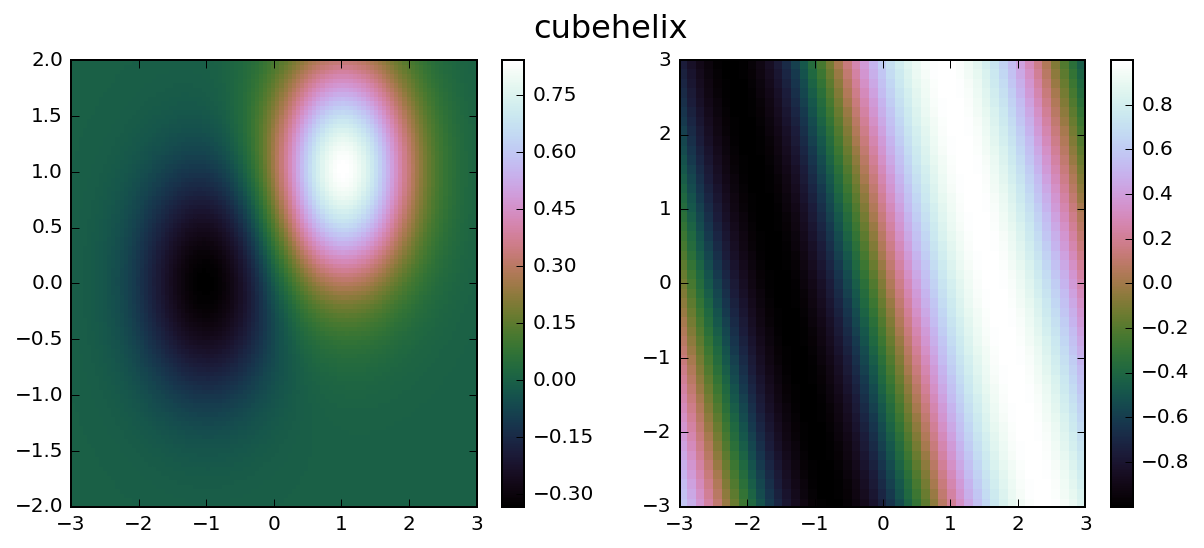

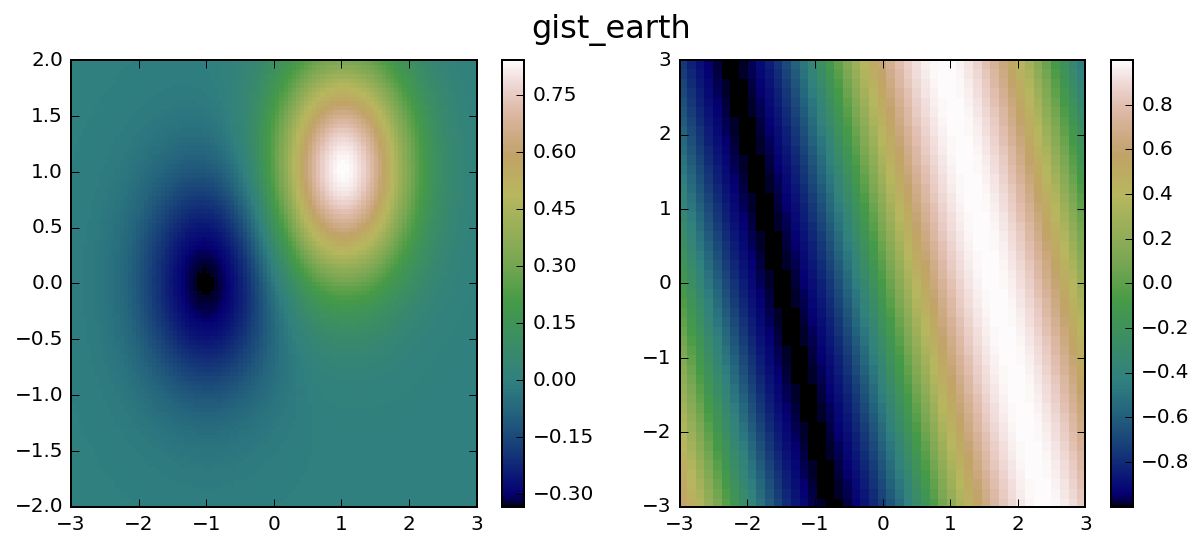

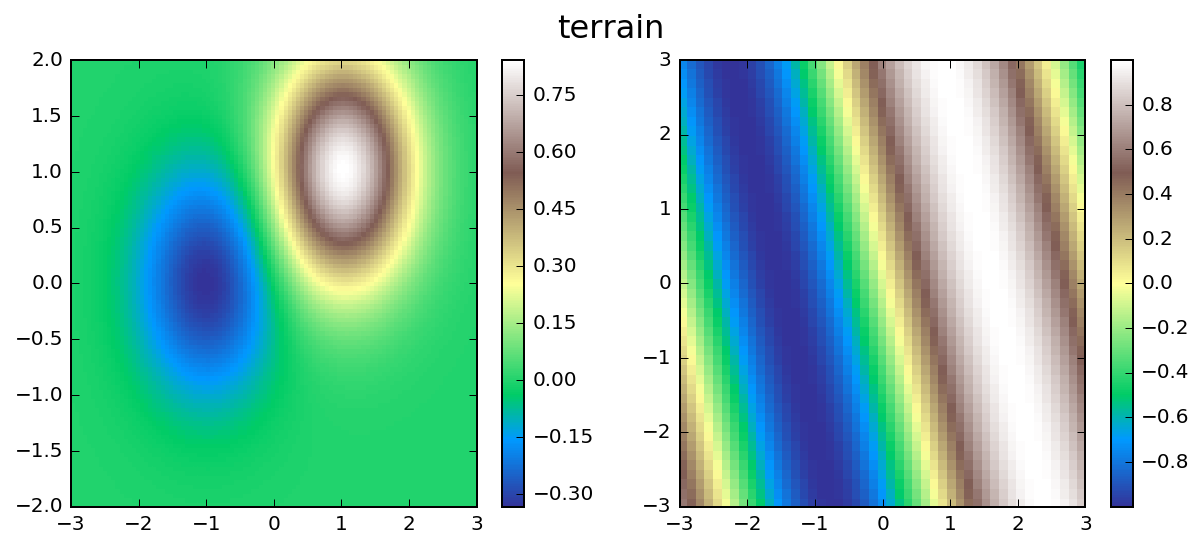

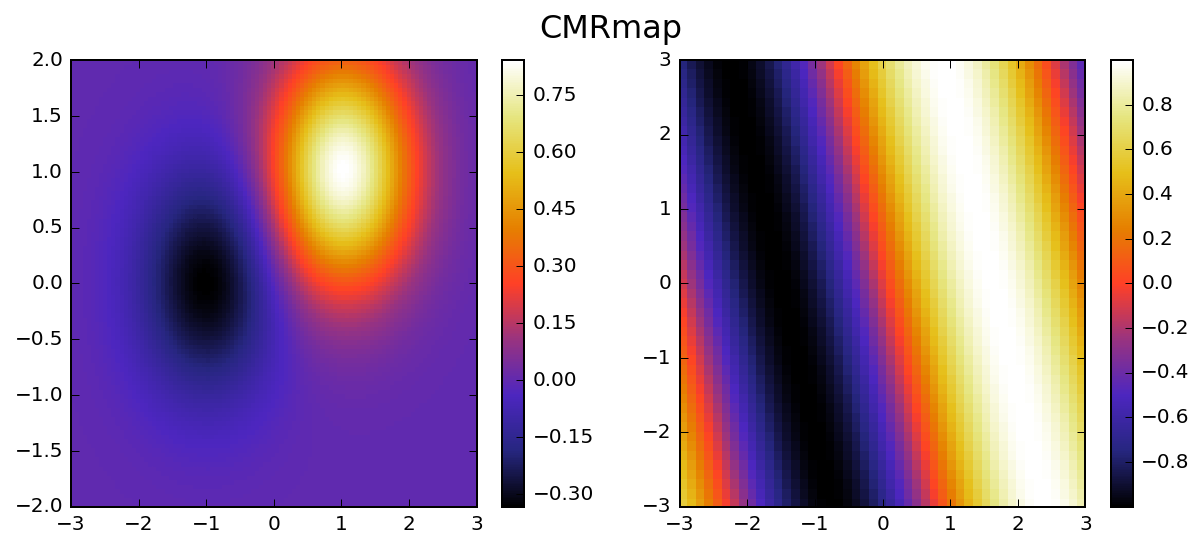

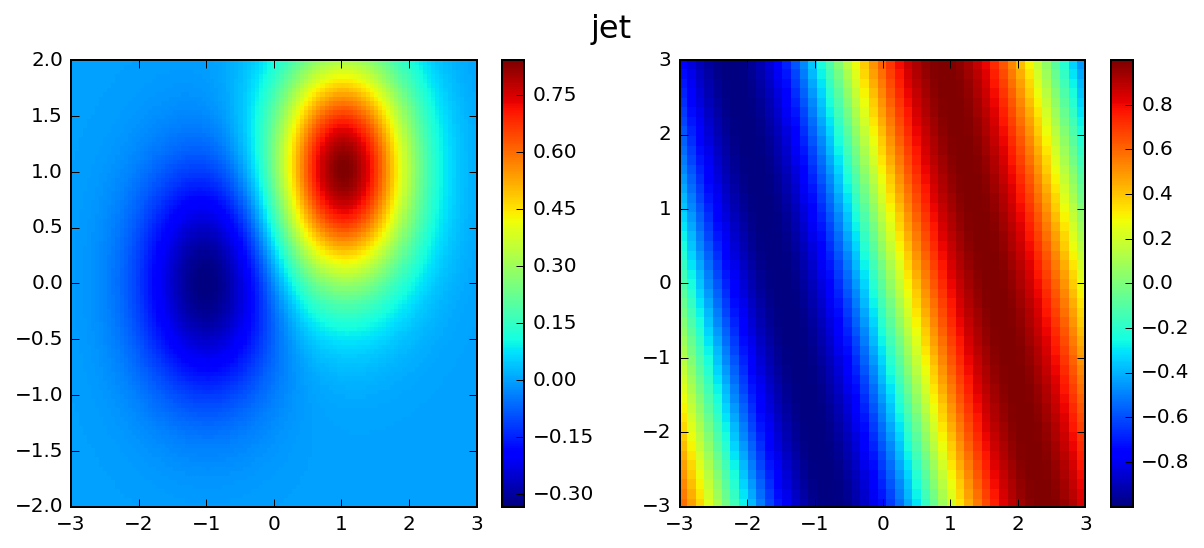

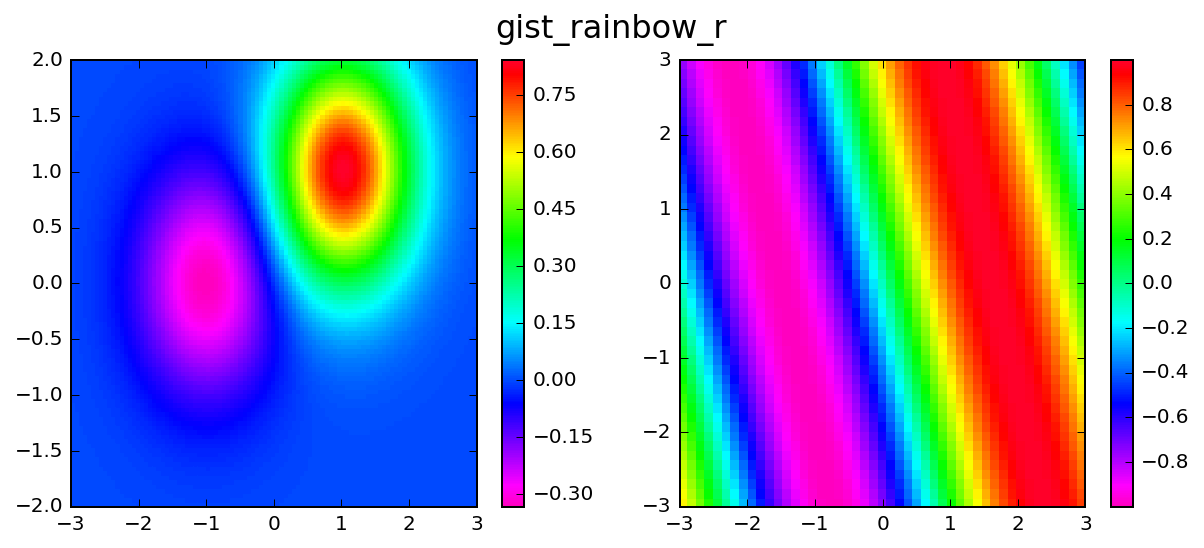

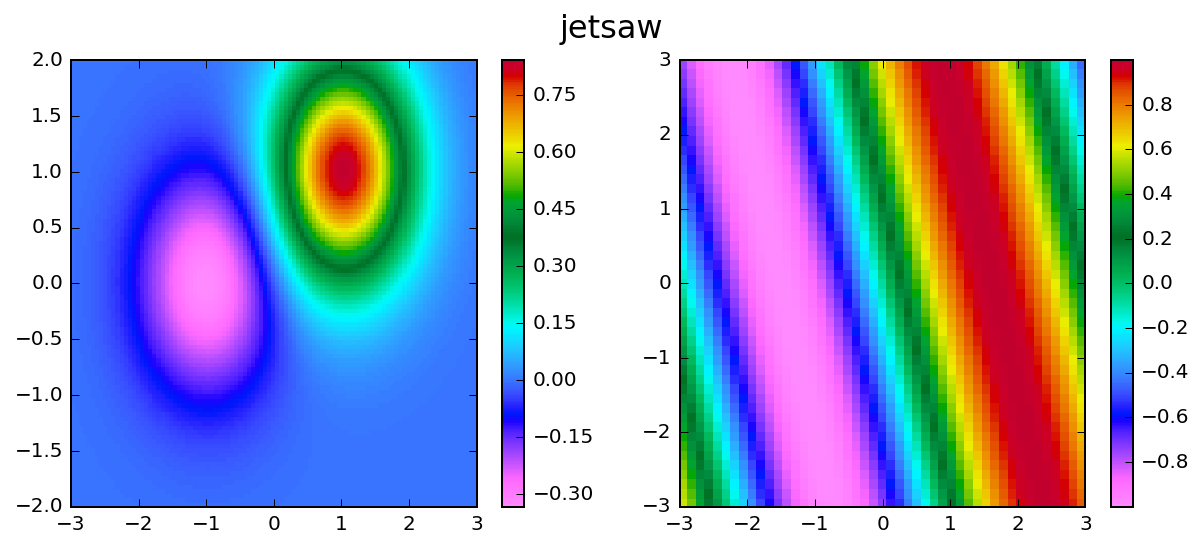

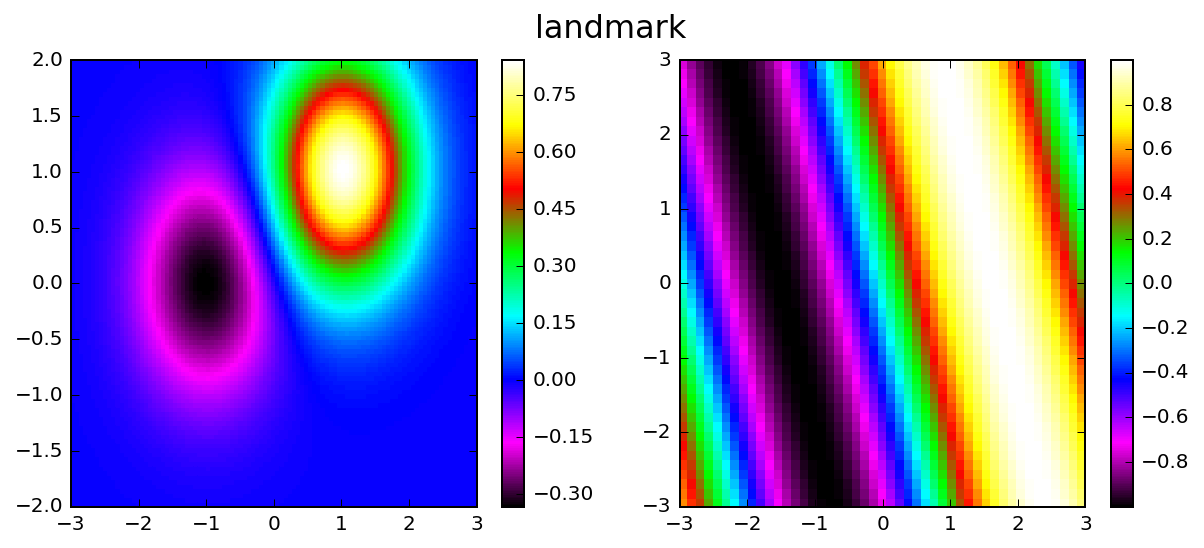

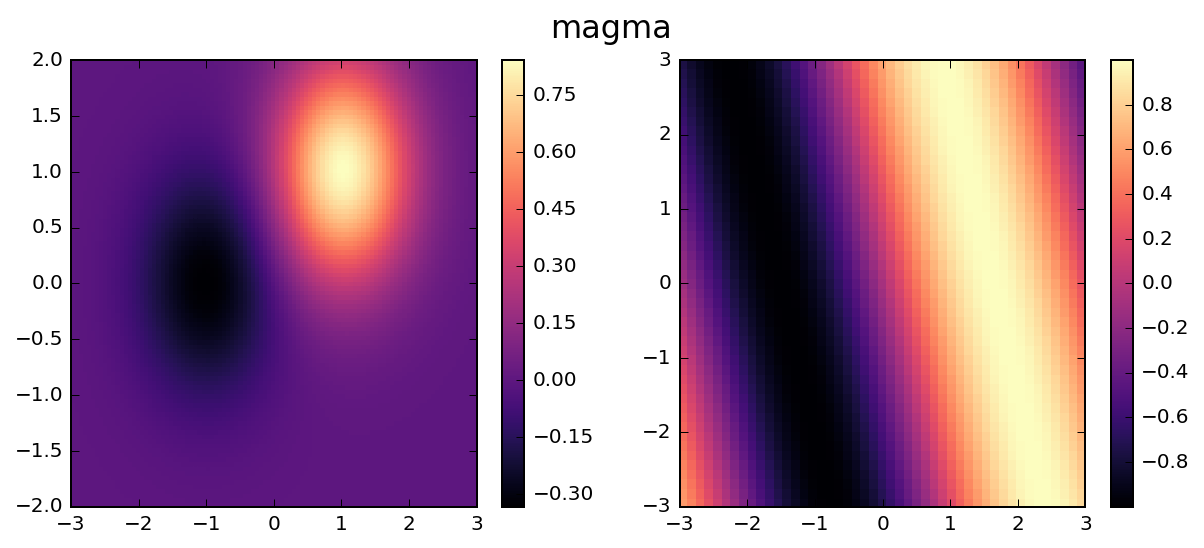

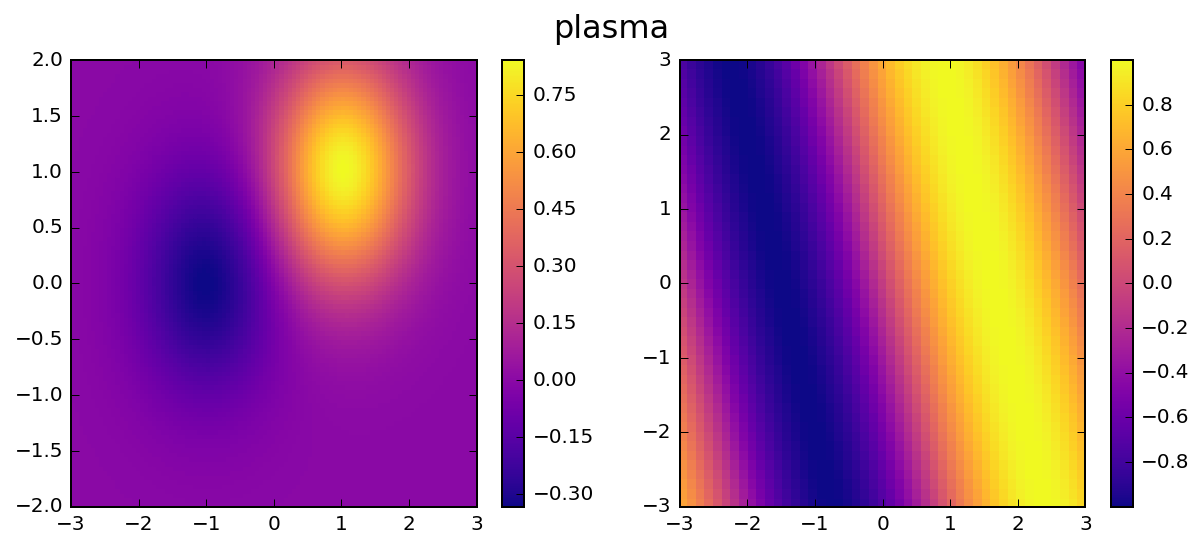

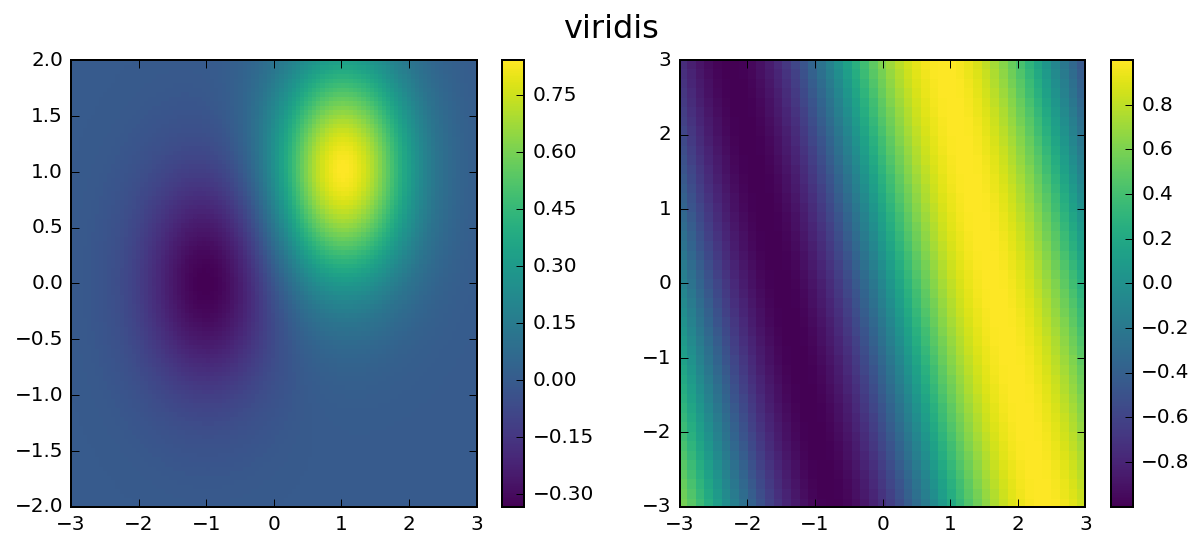

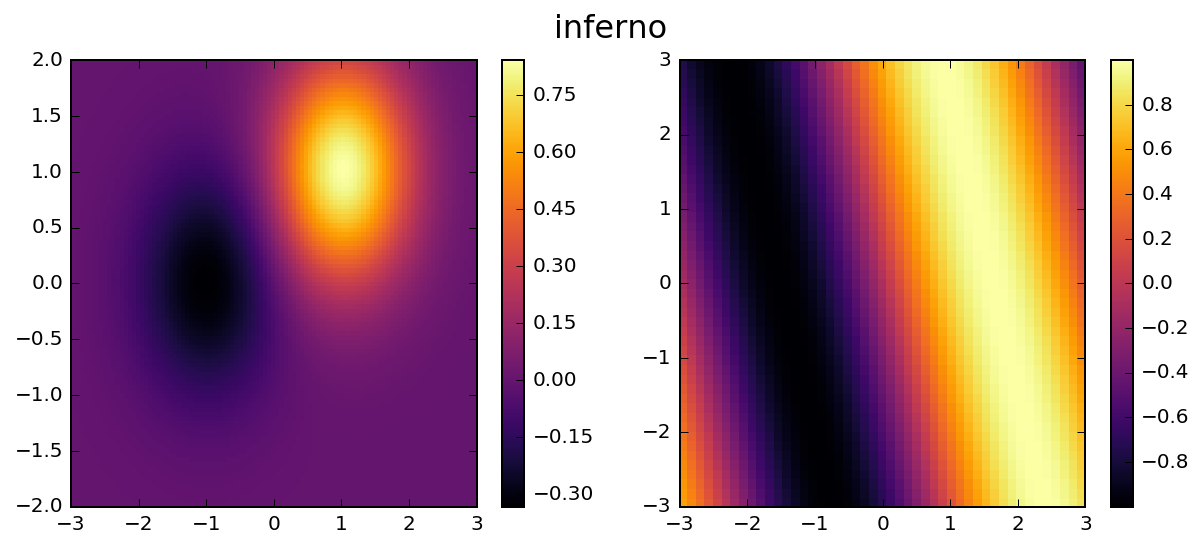

In [39]:
from matplotlib.mlab import bivariate_normal
# creating first dataset (a mountain and a trough)
N=100
X0, Y0 = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z0 = (bivariate_normal(X0,Y0,1.,1.,1.0,1.0))**2-0.4*(bivariate_normal(X0,Y0,1.0,1.0,-1.0,0.0))**2
Z0 = Z0/0.03

# creating second dataset (oblique stripes)
x = np.linspace(-np.pi, np.pi, 50)
y = np.linspace(-np.pi, np.pi, 50)
X1,Y1 = np.meshgrid(x,y)
Z1 = np.sin(X1 + Y1/4)

# plot
for ii in cmaps:
    f,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    dis0=ax[0].pcolormesh(X0, Y0, Z0, cmap=ii)
    dis1=ax[1].pcolormesh(X1, Y1, Z1, cmap=ii)
    ax[1].set_xlim(-3,3)
    ax[1].set_ylim(-3,3)
    plt.colorbar(dis0, ax=ax[0])
    plt.colorbar(dis1, ax=ax[1])
    plt.suptitle(ii, fontsize=16)

This second cell shows the same colormaps as before, this time used to visualize topography (and bathimetry) from Southern Italy (data taken from etopo1 dataset of NOAA).

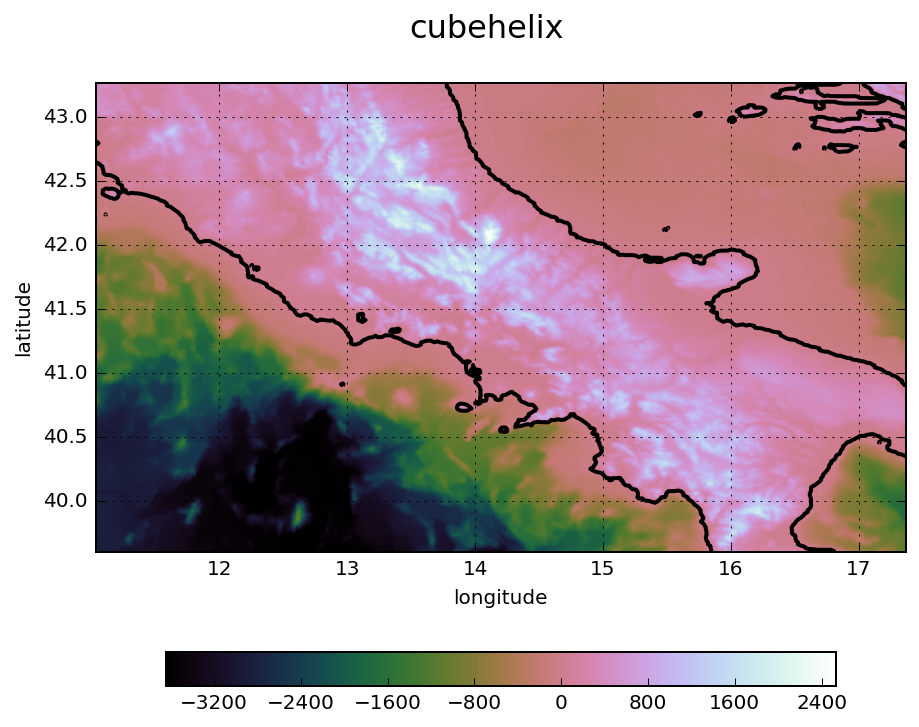

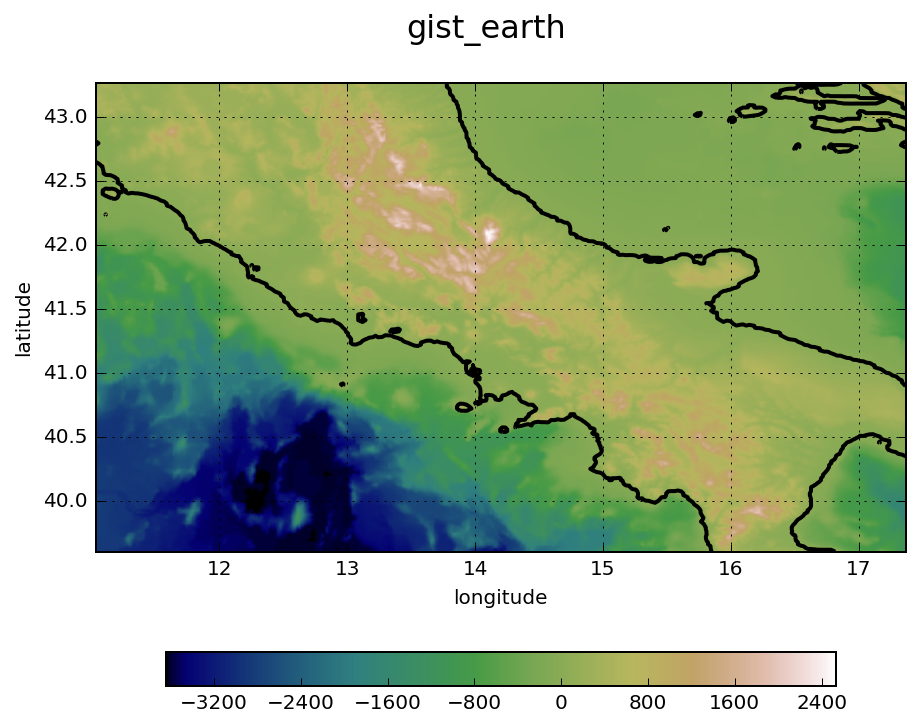

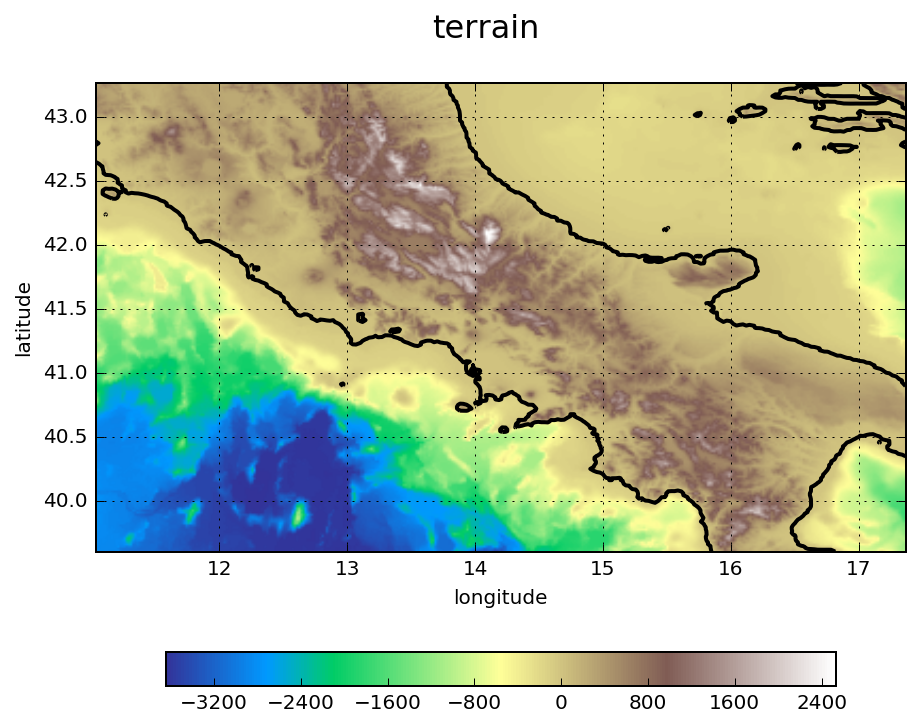

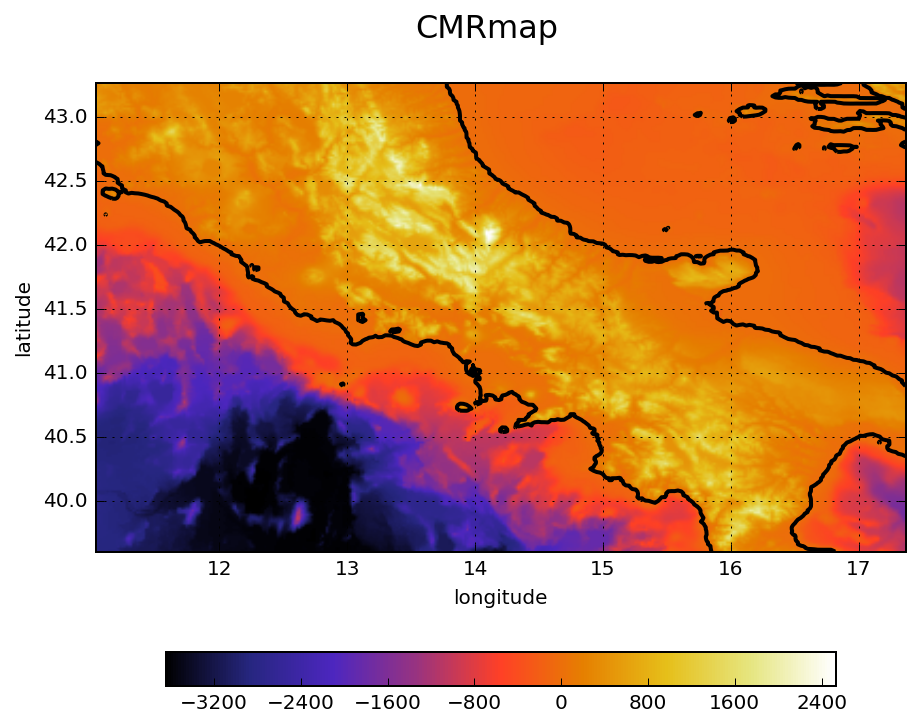

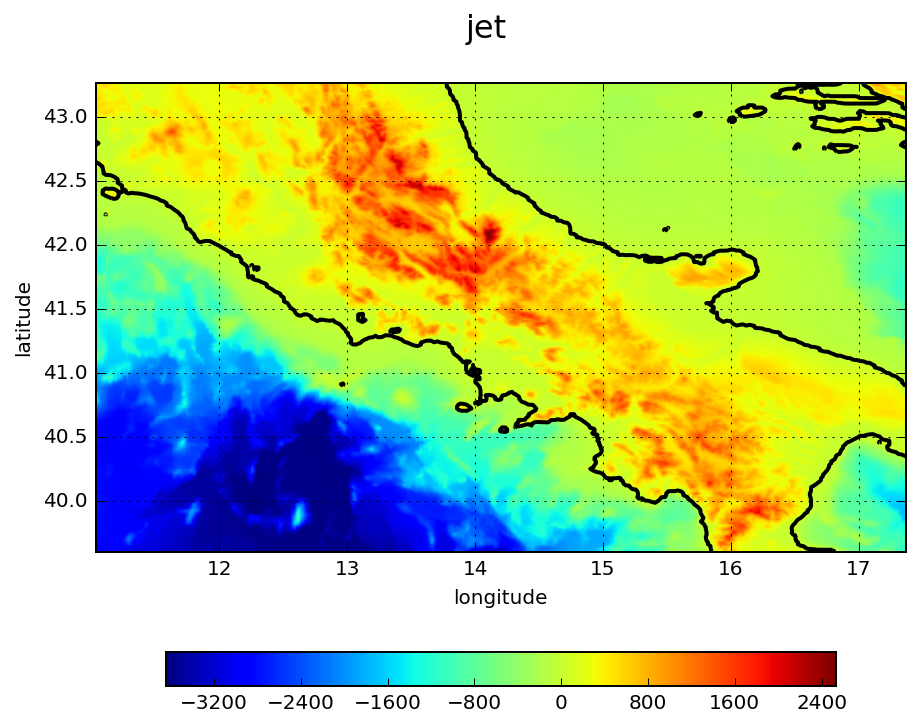

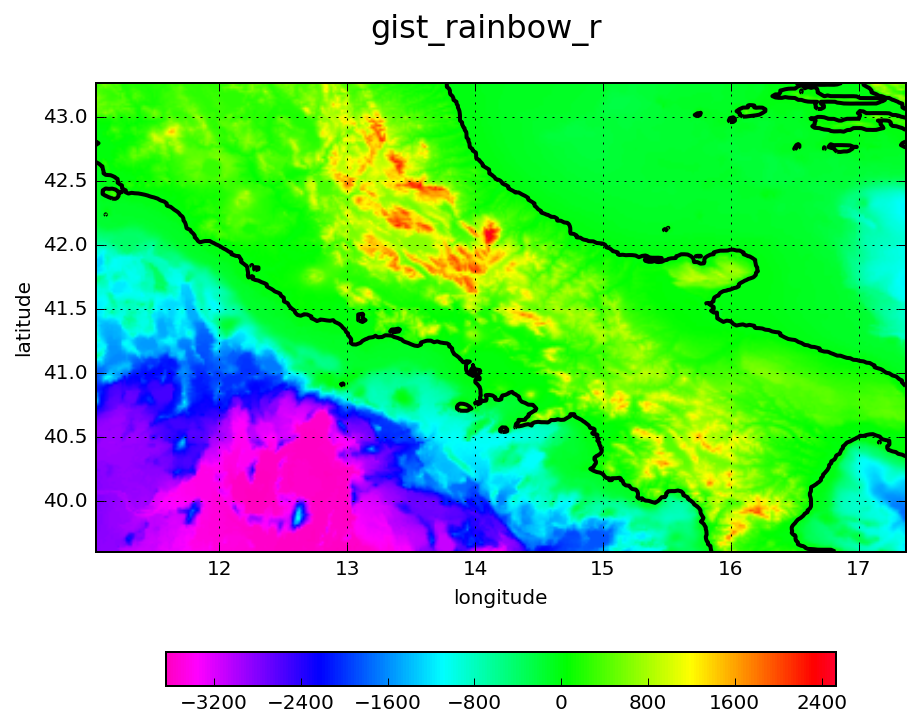

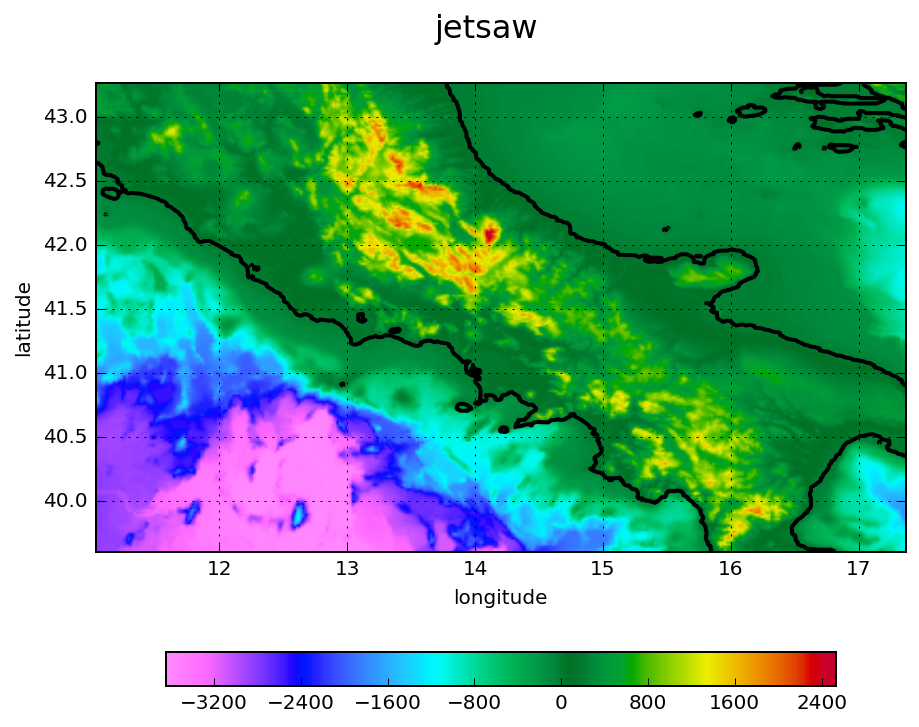

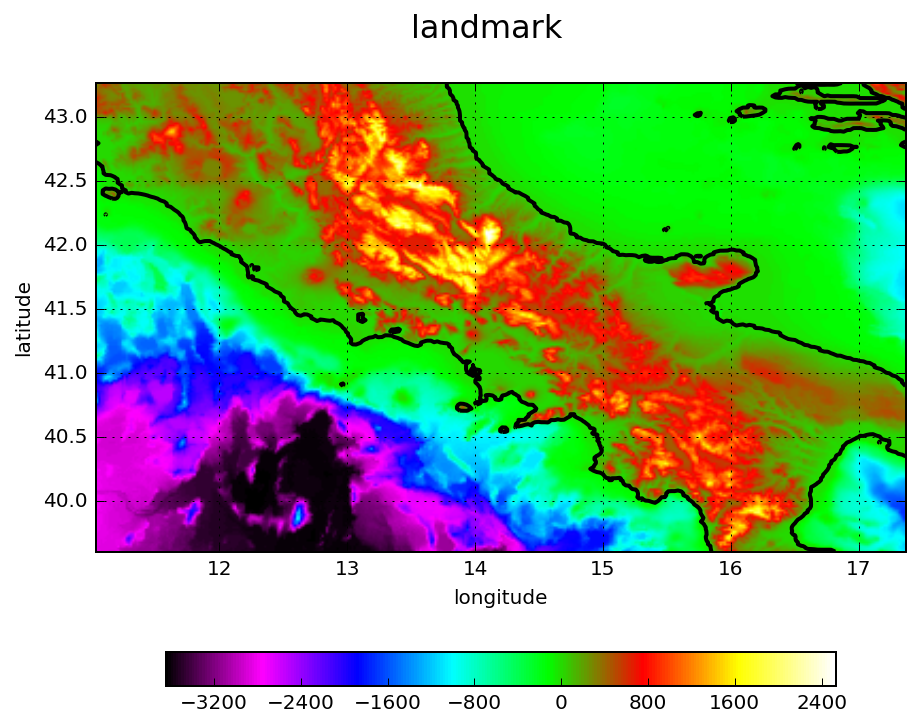

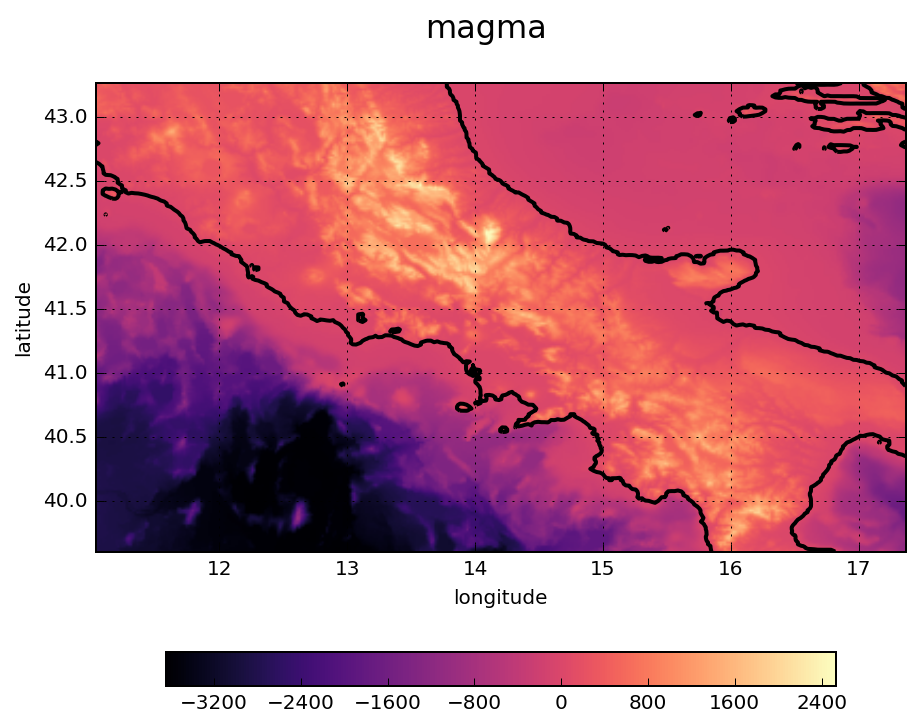

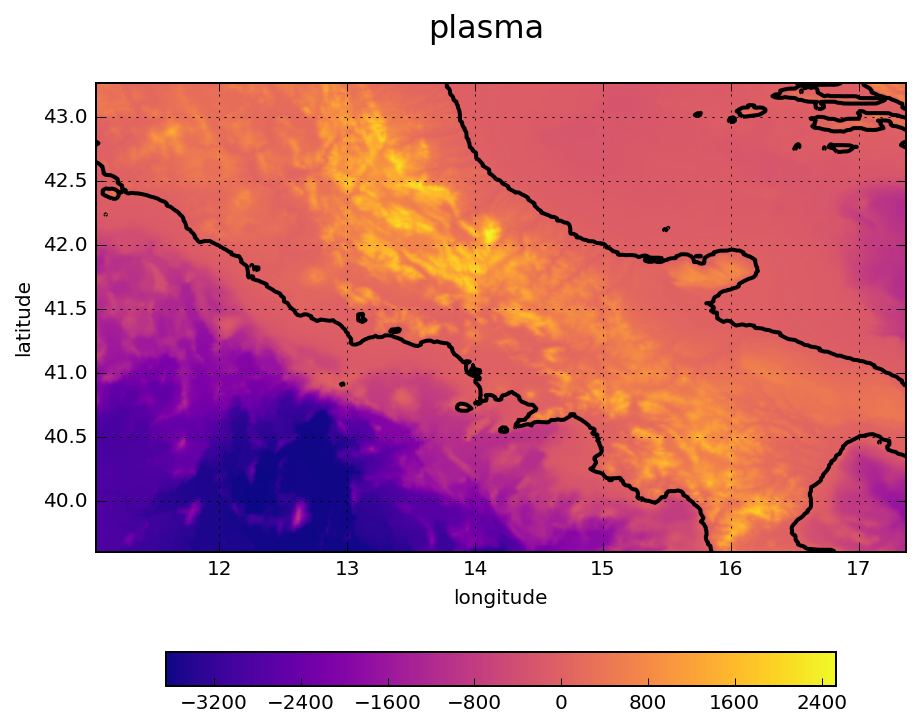

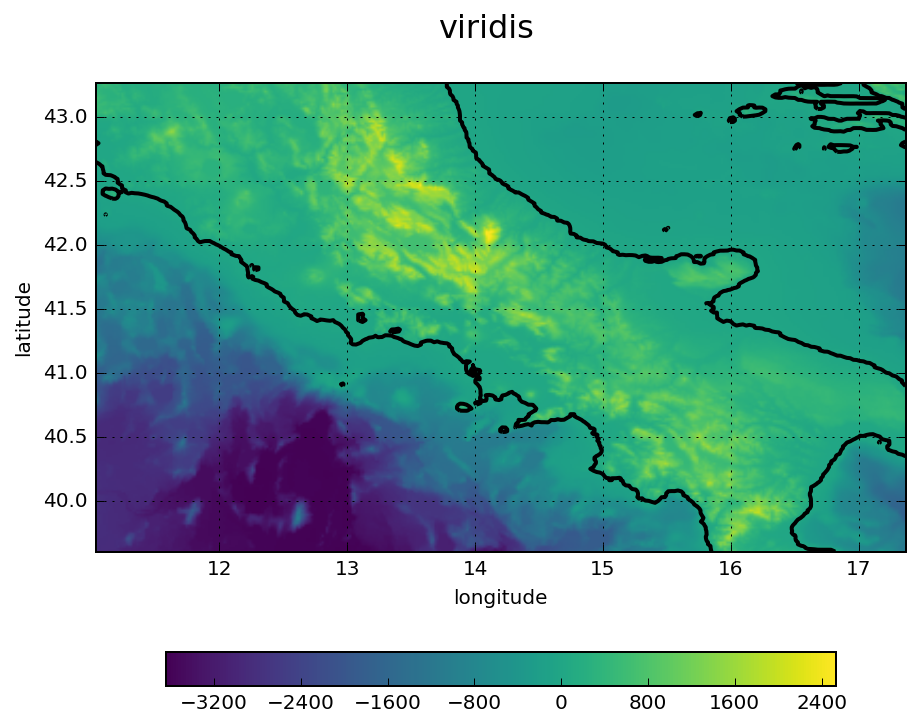

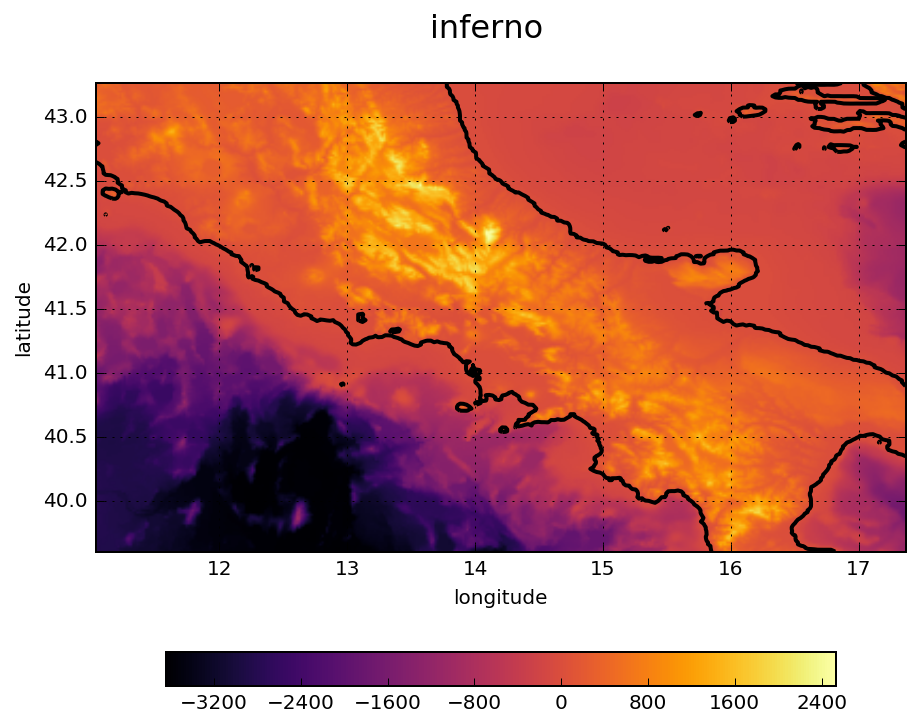

In [37]:
import netCDF4
from scipy.interpolate import griddata

etopo1 = netCDF4.Dataset('etopo1_southern_italy.nc')
lons = etopo1.variables['lon'][:]
lats = etopo1.variables['lat'][:]
topo = etopo1.variables['Band1'][:]

# plot topo and bathimetric data from Southern Italy in geographical coordinates
Xgeo, Ygeo = np.meshgrid(lons, lats)
xi=np.linspace(lons.min(),lons.max(),250)
yi=np.linspace(lats.min(),lats.max(),250)
X, Y = np.meshgrid(xi, yi)
Z=griddata((Xgeo.ravel(),Ygeo.ravel()),topo.ravel(),(X,Y),method='nearest')
for ii in cmaps:
    plt.figure(figsize=(8,6))
    im=plt.imshow(topo, extent=(X.min(), X.max(), Y.min(), Y.max()), origin='lower', cmap=ii)
    plt.contour(X,Y,Z, [0], linewidths=2, colors='k')
    plt.colorbar(im, shrink=0.75, orientation='horizontal')
    plt.suptitle(ii, fontsize=16)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.grid()